    任意の数列をソートするアルゴリズムの所要時間について考察する。アルゴリズムとしては，バブルソートとヒープソートの二つを実装し，比較する。
     以下にpythonで実装したバブルソートとヒープソートを行うの関数のコードを記す。

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

#バブルソートする関数
def bubble_sort(a):
    for i in range(1, len(a)):
        for j in range(i, 0, -1):
            if a[j] >= a[j-1]:
                break
            else:
                a[j], a[j-1] = a[j-1], a[j]

    return a
#ヒープソートする関数

def heap_sort(array):
    i = 0
    n = len(array)

    while(i < n):
        # ヒープを構成
        upheap(array, i)
        i += 1

    while(i > 1):
        # ヒープから最大値を取り出し
        i -= 1
        tmp = array[0]
        array[0] = array[i]
        array[i] = tmp

        # ヒープの再構成
        downheap(array, i-1)
    return array

# array[n]をヒープ構成部(0～n-1)の最適な位置へ移動
def upheap(array, n):
    while n != 0:
        parent = int((n - 1) / 2)
        if array[n] > array[parent]:
            # 親より大きな値の場合親子の値を交換
            tmp = array[n]
            array[n] = array[parent]
            array[parent] = tmp
            n = parent
        else:
            break

# ルート[0]をヒープ(0～n)の最適な位置へ移動
def downheap(array, n):
    if n == 0: return
    parent = 0
    while True:
        child = 2 * parent + 1 # array[n]の子要素
        if child > n: break
        if (child < n) and array[child] < array[child + 1]:
            child += 1
        if array[parent] < array[child]: # 子要素より小さい場合スワップ
            tmp = array[child]
            array[child] = array[parent]
            array[parent] = tmp
            parent = child; # 交換後のインデックスを保持
        else:
            break

    ここでは10,20,30,.....,1000個のランダムな整数が格納された配列を用意して，比較検討する。

In [44]:
number=np.arange(10,1001,10)

 バブルソートで配列をソートした時にかかる時間を以下のように測り，図1のグラフにプロットした。グラフの横軸は配列の長さ（個数），縦軸は所要時間（秒）である。
    図2の$y=x^2$のグラフと比較すると形状がほぼ一致していることから，バブルソートのアルゴリズムは$O(n^2)$のオーダーの時間複雑度を持つことがわかる。
    

配列の長さが 10 のときの所要時間:  0.00010204315185546875 (s)
配列の長さが 1000 のときの所要時間:  0.13654017448425293 (s)


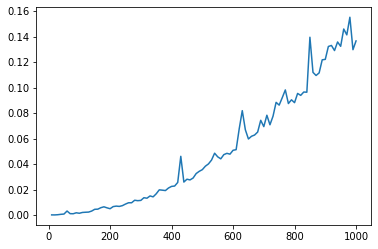

図1 バブルソートの所要時間


In [48]:
time_save=[]
for i in number:
    start=time.time()
    array=np.random.randint(0,i,i)
    array=bubble_sort(array)
    fin=time.time()
    time_save.append(fin-start)
    if i==10 or i==1000:
        print("配列の長さが",i,"のときの所要時間: ",fin-start,"(s)")
plt.plot(number,time_save)
plt.show()
print("図1 バブルソートの所要時間")

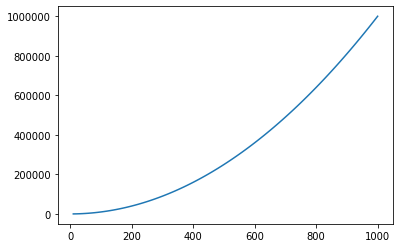

図2　y=x^2のグラフ


In [49]:
plt.plot(number,number**2)
plt.show()
print("図2　y=x^2のグラフ")

ヒープソートで配列をソートした時にかかる時間を以下のように測り，図4のグラフにプロットした。グラフの横軸は配列の長さ（個数），縦軸は所要時間（秒）である。
    図2の$y=ｘ\log(x)$のグラフと比較すると形状がほぼ一致していることから，バブルソートのアルゴリズムは$O(n\log(n))$のオーダーの時間複雑度を持つことがわかる。

配列の長さが 10 のときの所要時間:  0.00010013580322265625 (s)
配列の長さが 1000 のときの所要時間:  0.008179187774658203 (s)


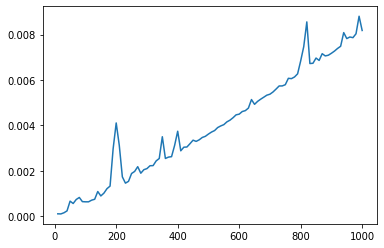

図3 ヒープソートの所要時間


In [53]:
time_save=[]
for i in number:
    start=time.time()
    array=np.random.randint(0,i,i)
    array=heap_sort(array)
    fin=time.time()
    time_save.append(fin-start)
    if i==10 or i==1000:
        print("配列の長さが",i,"のときの所要時間: ",fin-start,"(s)")
plt.plot(number,time_save)
plt.show()
print("図3 ヒープソートの所要時間")

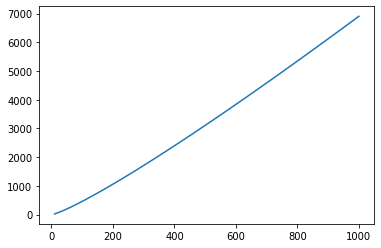

図4 y=xlogx のグラフ


In [51]:
def f(n):
    return n*np.log(n)
plt.plot(number,f(number))
plt.show()
print("図4 y=xlogx のグラフ")